In [11]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import networkx as nx
"""
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
"""
import warnings
warnings.filterwarnings('ignore')

# Reset display options to default
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')


In [12]:
df=pd.read_csv('CSVs/CLEAN_DATASET.csv',sep=",")
display(df)

,Row,Anon Student Id,Unit,Section,Problem Name,Problem View,Step Name,Step Start Time,Step End Time,Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)
0,9938,52vEY7f17k,CTA1_13,CTA1_13-1,PROP04,1,R1C1,2005-09-09 12:23:34.0,2005-09-09 12:24:07.0,33.0,NaN,1,0,0,1,NaN,NaN
1,9939,52vEY7f17k,CTA1_13,CTA1_13-1,PROP04,1,R1C2,2005-09-09 12:24:07.0,2005-09-09 12:24:22.0,15.0,NaN,1,0,0,1,NaN,NaN
2,9940,52vEY7f17k,CTA1_13,CTA1_13-1,PROP04,1,R3C1,2005-09-09 12:24:22.0,2005-09-09 12:25:40.0,78.0,78.0,0,2,0,1,Define Variable,1
3,9941,52vEY7f17k,CTA1_13,CTA1_13-1,PROP04,1,R3C2,2005-09-09 12:25:40.0,2005-09-09 12:27:24.0,104.0,104.0,0,4,9,1,"Using small numbers~~Write expression, positiv...",1~~1~~1
4,9942,52vEY7f17k,CTA1_13,CTA1_13-1,PROP04,1,R4C1,2005-09-09 12:27:24.0,2005-09-09 12:27:30.0,6.0,NaN,1,0,0,1,Entering a given,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203666,1078856,JP20cryBg8,CTA1_24,CTA1_24-1,NOV05,1,R5C1,2006-04-12 10:17:08.0,2006-04-12 10:18:19.0,71.0,71.0,0,2,5,1,"Entering a given~~Convert unit, mixed",21~~1
203667,1078857,JP20cryBg8,CTA1_24,CTA1_24-1,NOV05,1,R1C2,2006-04-12 10:18:19.0,2006-04-12 10:18:40.0,21.0,NaN,1,0,0,1,NaN,NaN
203668,1078858,JP20cryBg8,CTA1_24,CTA1_24-1,NOV05,1,R2C2,2006-04-12 10:18:40.0,2006-04-12 10:18:44.0,4.0,NaN,1,0,0,1,Identifying units,7
203669,1078859,JP20cryBg8,CTA1_24,CTA1_24-1,NOV05,1,R3C2,2006-04-12 10:18:44.0,2006-04-12 10:20:55.0,131.0,131.0,0,1,0,1,"Using small numbers~~Write expression, positiv...",8~~5~~11


In [13]:
dict_analisis_outliers = {}
alumnos = list(df['Anon Student Id'].unique())

for alumno in alumnos:
    print(f"Processing student: {alumno}")
    df_alumno = df[df['Anon Student Id'] == alumno]
    dict_analisis_outliers[alumno] = {}
    
    problems = list(df_alumno['Problem Name'].unique())
    for problem in problems:
        df_problem = df_alumno[df_alumno['Problem Name'] == problem]
        
        # Acumular datos por problema
        total_problem_view = df_problem['Problem View'].sum()
        total_incorrects = df_problem['Incorrects'].sum()
        total_hints = df_problem['Hints'].sum()
        total_corrects = df_problem['Corrects'].sum()
        
        # Calcular estadísticas globales para el problema
        failures = total_incorrects / total_problem_view if total_problem_view != 0 else 0
        hints = total_hints / total_problem_view if total_problem_view != 0 else 0
        corrects = total_corrects / total_problem_view if total_problem_view != 0 else 0
        
        # Guardar los datos en el diccionario
        dict_analisis_outliers[alumno][problem] = (failures, hints, corrects)

# Ejemplo de cómo acceder a los datos para un estudiante y problema específico
for alumno in dict_analisis_outliers:
    for problem in dict_analisis_outliers[alumno]:
        print(f"Student: {alumno}, Problem: {problem}")
        print(f"Failures: {dict_analisis_outliers[alumno][problem][0]}")
        print(f"Hints: {dict_analisis_outliers[alumno][problem][1]}")
        print(f"Corrects: {dict_analisis_outliers[alumno][problem][2]}")

Processing student: 52vEY7f17k
Processing student: 6W08a98ZQV
Processing student: 8o0mJnIpFH
Processing student: g209g5Vve6
Processing student: l8kuAhlIWI
Processing student: QER9PsCgBT
Processing student: yDO9pl8GC0
Processing student: 6Ax4SKe470
Processing student: 7oiAa7MlW2
Processing student: 879eYkR2Wu
Processing student: 8ZPoEJbXB7
Processing student: CaA0123UJL
Processing student: ey9rvMnU57
Processing student: z9svx3mA4s
Processing student: 6dGeA2ZpO4
Processing student: f4fNYL73Z2
Processing student: oEt3YTvS4G
Processing student: t0fI2c7EMH
Processing student: 23T7Up1oQ6
Processing student: 5cuKF3lL4D
Processing student: 938jD6Z338
Processing student: c3Ee3W8hyq
Processing student: h0UbH181l8
Processing student: tlJn3I40bf
Processing student: y5009rpZ12
Processing student: yB480DNZ70
Processing student: 8d194g9ccT
Processing student: 88Uhb8760x
Processing student: dvG32rxRzQ
Processing student: E38It7fjg0
Processing student: i8f2gg51r5
Processing student: mI0bEZaepz
Processi

In [14]:
import json
with open('JSONs/nested_data_alumnos.json', 'w') as json_file:
    json.dump(dict_analisis_outliers, json_file, indent=4)

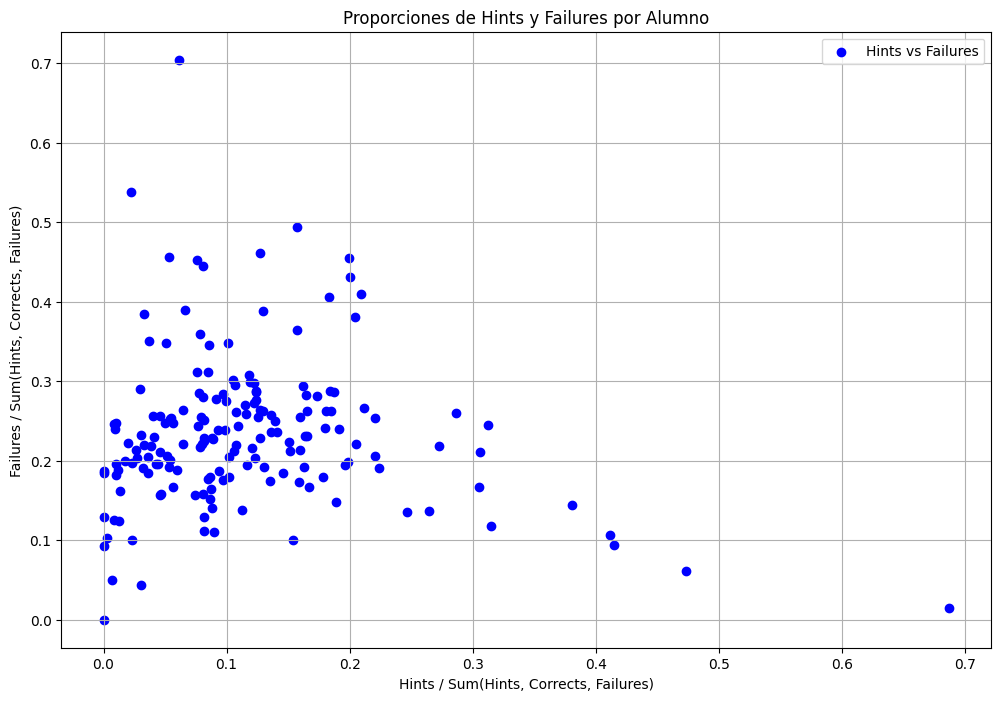

In [17]:
# Inicializar listas para las coordenadas y etiquetas
data_points = []
x_values = []
y_values = []
labels = []

# Calcular proporciones para cada alumno
for student, problems in dict_analisis_outliers.items():
    total_hints = 0
    total_corrects = 0
    total_failures = 0

    # Calcular sumatorios de hints, corrects y failures para el alumno
    for problem, stats in problems.items():
        total_failures += stats[0]
        total_hints += stats[1]
        total_corrects += stats[2]

    # Calcular suma total de hints, corrects y failures
    total_sum = total_hints + total_corrects + total_failures

    # Calcular proporciones x e y
    x =(total_hints / total_sum if total_sum != 0 else 0)
    y = (total_failures / total_sum if total_sum != 0 else 0)

    # Guardar los datos del alumno
    data_points.append([x, y, student])
    x_values.append(x)
    y_values.append(y)
    labels.append(student)



# Graficar
plt.figure(figsize=(12, 8))
plt.scatter(x_values, y_values, c='blue', label='Hints vs Failures')


plt.xlabel('Hints / Sum(Hints, Corrects, Failures)')
plt.ylabel('Failures / Sum(Hints, Corrects, Failures)')
plt.title('Proporciones de Hints y Failures por Alumno')
plt.legend()
plt.grid(True)
plt.show()

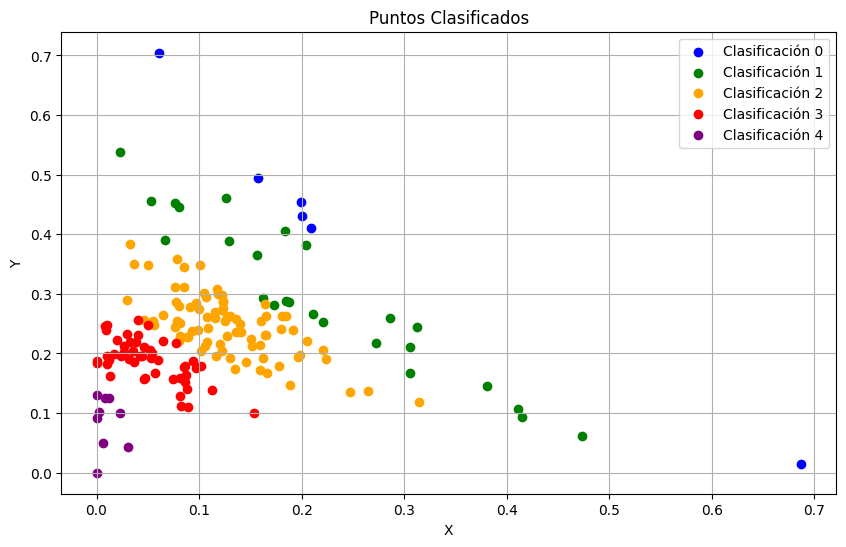

In [18]:
def clasificar_punto(x, y):
    aux = float(x) + float(y)
   
    if aux <= 0.15:
        return 4
    elif aux <= 0.30:
        return 3
    elif aux <= 0.45:
        return 2
    elif aux <= 0.60:
        return 1
    else:
        return 0
# Clasificar y añadir la clasificación a cada sublista

for punto in data_points:
    x, y, alumno = punto
    clasificacion = clasificar_punto(x, y)
    punto.append(clasificacion)

# Preparar los datos para la representación
x_vals = [punto[0] for punto in data_points]
y_vals = [punto[1] for punto in data_points]
clasificaciones = [punto[3] for punto in data_points]

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))

# Usar colores distintos para cada clasificación
colores = ['blue', 'green', 'orange', 'red', 'purple']
for clasificacion in range(5):
    indices = [i for i, c in enumerate(clasificaciones) if c == clasificacion]
    plt.scatter(
        [x_vals[i] for i in indices],
        [y_vals[i] for i in indices],
        color=colores[clasificacion],
        label=f'Clasificación {clasificacion}'
    )

# Etiquetas y título
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Puntos Clasificados')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [20]:
# Convertir la lista de puntos a un DataFrame de pandas
df = pd.DataFrame(data_points, columns=['X', 'Y', 'Alumno', 'Dificultad'])

# Guardar el DataFrame en un archivo CSV
df.to_csv('CSVs/puntos_clasificados.csv', index=False)

print("Datos guardados en 'puntos_clasificados.csv'")

Datos guardados en 'puntos_clasificados.csv'
